In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

from PIL import Image
from pathlib import Path
from matplotlib.lines import Line2D

In [2]:
EXP_BASE_DIR = Path('C:/Users/Jonathan/Documents/Development/git/gitlab/projectpr/models/experiments')
ASSETS_PATH = Path('C:/Users/Jonathan/Documents/Development/git/gitlab/projectpr/data/interim/heatmaps/assets')

LABEL_FORMAT = '.txt'

SIDE_LENGTH = 384

CMAP_ATT = matplotlib.colors.LinearSegmentedColormap.from_list("", ["tab:orange", "tab:orange"])
CMAP_DEF = matplotlib.colors.LinearSegmentedColormap.from_list("", ["tab:blue", "tab:blue"])

LEG_ATT = Line2D([0], [0], label='ATTACKER', color='tab:orange', marker='s', linestyle='')
LEG_DEF = Line2D([0], [0], label='DEFENDER', color='tab:blue', marker='s', linestyle='')

In [3]:
EXPERIMENTS  = ['ex1']
VIDEOS = ['vid_ascent', 'vid_haven']

In [4]:
def retrieve_labels(lines):
    labels = []
    for line in lines:
        elems = line.split(' ')        
        lbl = {'lbl': elems[0],
               'x': int(float(elems[1])*SIDE_LENGTH),
               'y': int(float(elems[2])*SIDE_LENGTH),
               'c': float(elems[5])
              }
        labels.append(lbl)

    return labels        

In [5]:
def plot_map_single(video, hm_data_att, hm_data_def):
    map = video.replace('vid_', '')
    img_asset_path = ASSETS_PATH / (map + '.png')
    img_asset = Image.open(str(img_asset_path))

    

    hm_att = np.ma.masked_where(hm_data_att == 0, hm_data_att)
    hm_def = np.ma.masked_where(hm_data_def == 0, hm_data_def)

    fig1, ax1 = plt.subplots(figsize=(8, 8))
    ax1.imshow(img_asset)
    ax1.imshow(hm_att, cmap=CMAP_ATT, interpolation='none')
    ax1.set_title(f'Map: {map.upper()}')
    ax1.legend(handles=[LEG_ATT])
    fig1.savefig(f'{map.upper()}_ATTACKER.png')

    fig2, ax2 = plt.subplots(figsize=(8, 8))
    ax2.imshow(img_asset)
    ax2.imshow(hm_def, cmap=CMAP_DEF, interpolation='none')
    ax2.set_title(f'Map: {map.upper()}')
    ax2.legend(handles=[LEG_DEF])
    fig2.savefig(f'{map.upper()}_DEFENDER.png')

In [6]:
def plot_map_combined(video, hm_data_att, hm_data_def):
    map = video.replace('vid_', '')
    img_asset_path = ASSETS_PATH / (map + '.png')
    img_asset = Image.open(str(img_asset_path))

    hm_att = np.ma.masked_where(hm_data_att == 0, hm_data_att)
    hm_def = np.ma.masked_where(hm_data_def == 0, hm_data_def)

    
    
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    ax1.imshow(img_asset)
    ax1.imshow(hm_att, cmap=CMAP_ATT, interpolation='none')
    ax1.imshow(hm_def, cmap=CMAP_DEF, interpolation='none')
    ax1.set_title(f'Map: {map.upper()}')
    ax1.legend(handles=[LEG_ATT, LEG_DEF])
    fig1.savefig(f'{map.upper()}_COMBINED.png')

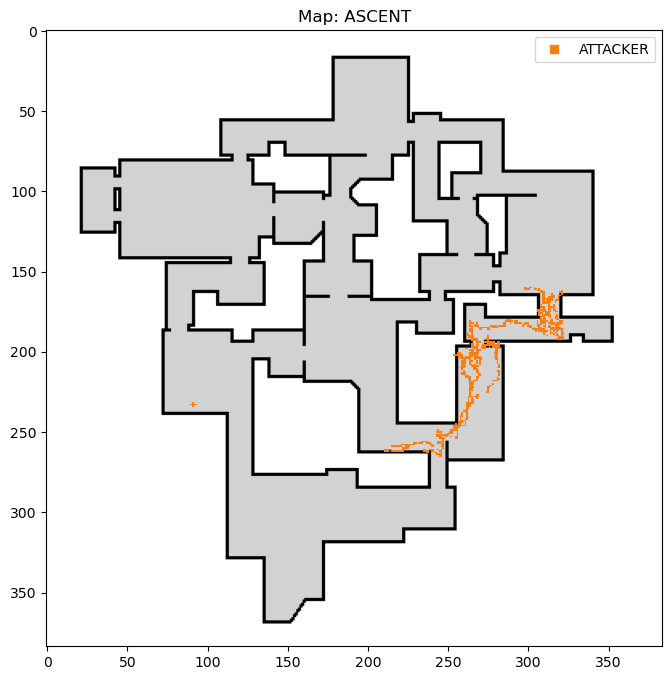

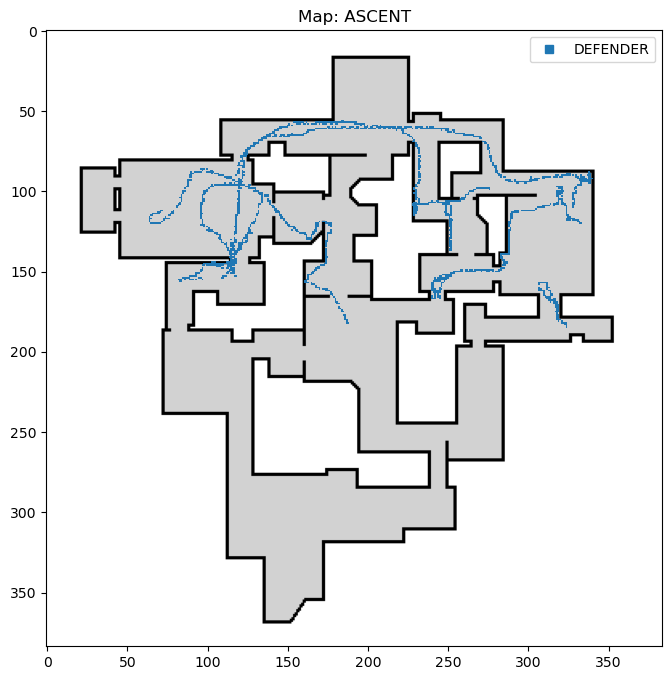

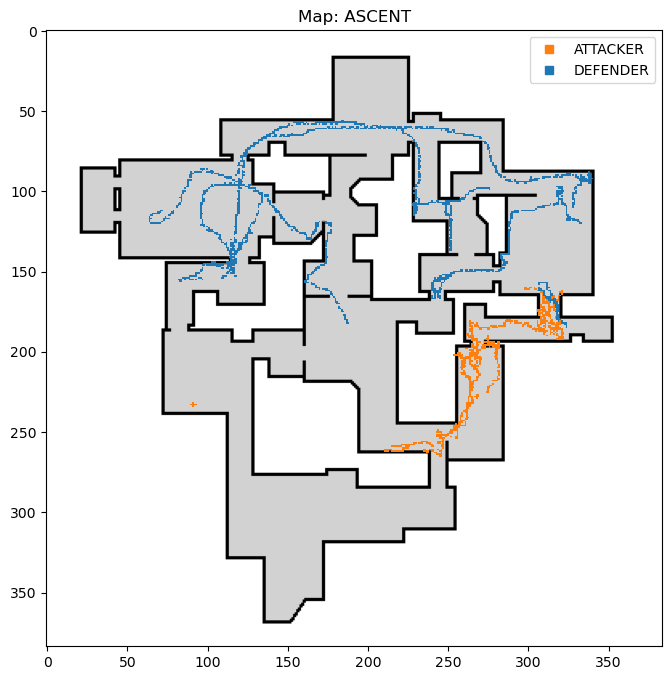

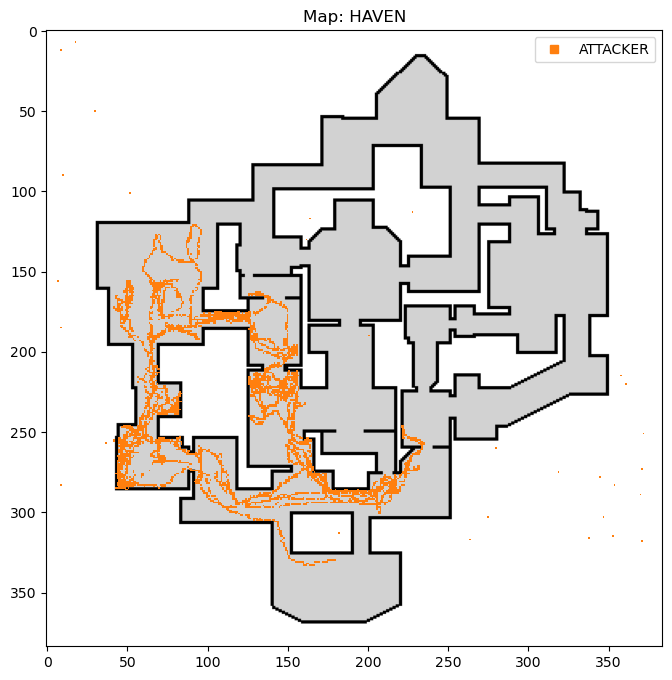

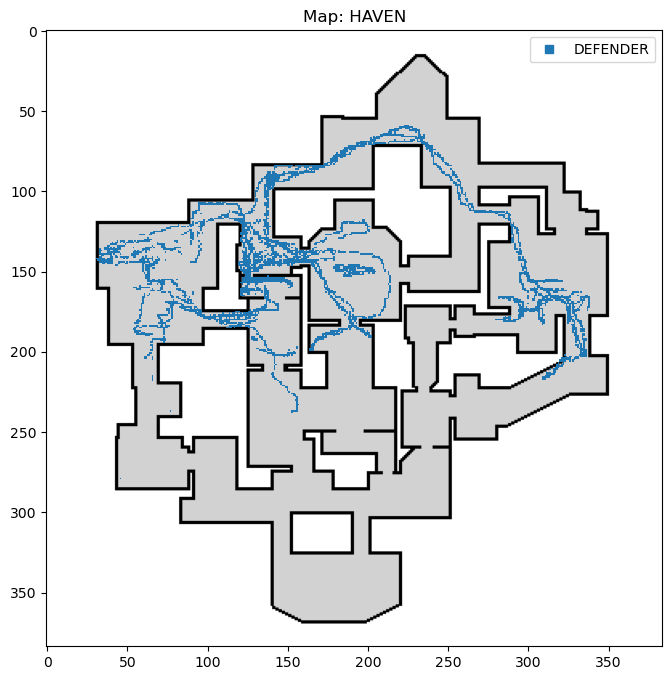

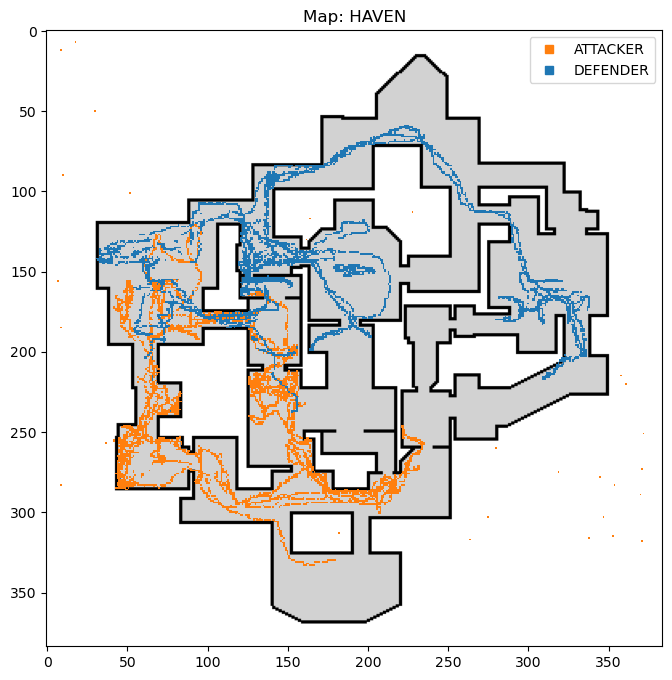

In [7]:
for exp in EXPERIMENTS:
    for vid in VIDEOS:
        label_path = Path(f'{exp}/detect/{vid}/labels')
        lbl_files = [i for i in os.listdir(EXP_BASE_DIR / label_path) if i.endswith(LABEL_FORMAT)]

        hm_data_att = np.zeros((SIDE_LENGTH, SIDE_LENGTH), dtype=int)
        hm_data_def = np.zeros((SIDE_LENGTH, SIDE_LENGTH), dtype=int)

        for (i,_) in enumerate(lbl_files):
            with open(EXP_BASE_DIR / label_path / lbl_files[i]) as file:
                lines = [line.rstrip() for line in file]
        
            lbls = retrieve_labels(lines)

            for l in lbls:
                if l['lbl'] == '0':
                    hm_data_att[l['y']][l['x']] = 1
                else:
                    hm_data_def[l['y']][l['x']] = 1

        plot_map_single(vid, hm_data_att, hm_data_def)
        plot_map_combined(vid, hm_data_att, hm_data_def)